In [4]:
import numpy as np


from autooed.problem import build_problem
from autooed.mobo import build_algorithm
from autooed.utils.seed import set_seed
from autooed.utils.initialization import generate_random_initial_samples
from autooed.utils.plot_modified import plot_performance_space, plot_performance_metric

import matplotlib.pyplot as plt

from arguments import get_args

========== Problem Definition ==========
# name: DTLZ2
# n_var: 6
# n_obj: 2
# n_constr: 0

========== Algorithm Setup ==========
# algorithm: TSEMO
# surrogate: GaussianProcess
# acquisition: ThompsonSampling
# solver: NSGA2
# selection: HypervolumeImprovement



/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 4 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a

6/8 complete


/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a

7/8 complete


/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 4 of parameter k1__k2__length_scale is close to the specified upper bound 31.622776601683793. Increasing the bound and calling fit again may find a

8/8 complete


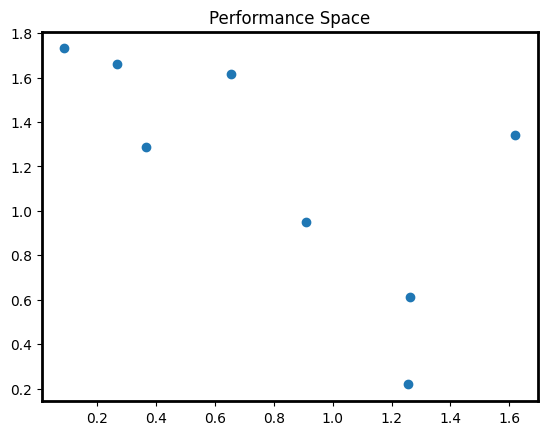

In [5]:
if __name__ == '__main__':

    # load arguments
    args, module_cfg = get_args()

    # set random seed
    set_seed(args.seed)

    # build problem
    problem = build_problem(args.problem)
    print(problem)

    # build algorithm
    algorithm = build_algorithm(args.algo, problem, module_cfg)
    print(algorithm)

    # generate initial random samples
    X = generate_random_initial_samples(problem, args.n_init_sample)
    Y = np.array([problem.evaluate_objective(x) for x in X])

    # optimization
    while len(X) < args.n_total_sample:

        # propose design samples
        X_next = algorithm.optimize(X, Y, None, args.batch_size)

        # evaluate proposed samples
        Y_next = np.array([problem.evaluate_objective(x) for x in X_next])

        # combine into dataset
        X = np.vstack([X, X_next])
        Y = np.vstack([Y, Y_next])

        print(f'{len(X)}/{args.n_total_sample} complete')

    # plot
    plot_performance_metric(Y, problem.obj_type)
    plt.close('all')
    plot_performance_space(Y)

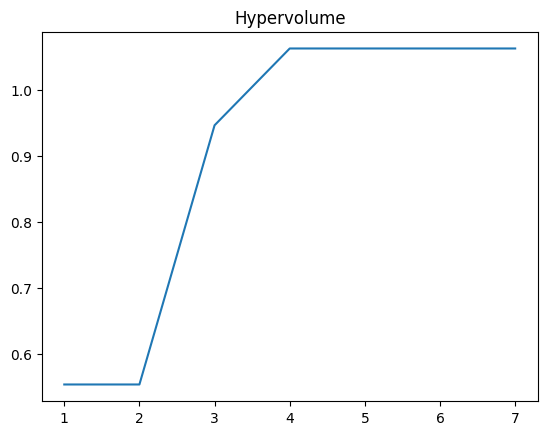

In [4]:
plot_performance_metric(Y, problem.obj_type)